# View data

In [36]:
SEED = 42



from utils import *
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%pip install nltk

## Load Data

In [6]:
vocab_kos = load_vocabulary("data/bag+of+words/vocab.kos.txt")
vocab_nips = load_vocabulary("data/bag+of+words/vocab.nips.txt")
display(len(vocab_kos))
display(len(vocab_nips))

6906

12419

In [12]:
counts_matrix_kos = load_docwords("data/bag+of+words/docword.kos.txt")
counts_matrix_nips = load_docwords("data/bag+of+words/docword.nips.txt")

3430 6906 353160
1500 12419 746316


In [13]:
counts_matrix_nips

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
tfdidf_transformer = TfidfTransformer()
tf_idf_matrix_kos = tfdidf_transformer.fit_transform(counts_matrix_kos)
tf_idf_matrix_nips = tfdidf_transformer.fit_transform(counts_matrix_nips)

## Vocabulary Lemmatization - TODO

In [8]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_vocabulary = []

for word in vocabulary:
    lemmatized_word = lemmatizer.lemmatize(word)
    if lemmatized_word != word:
        print(word, lemmatized_word)
    lemmatized_vocabulary.append(lemmatized_word)

print(len(lemmatized_vocabulary), len(set(lemmatized_vocabulary))) #1000 words less -> lower dimension?
print(lemmatized_vocabulary)

abcs abc
abortions abortion
abuses abuse
accidents accident
accounts account
accusations accusation
achievements achievement
actions action
activists activist
activities activity
acts act
adams adam
addresses address
adds add
adjustments adjustment
administrations administration
ads ad
adults adult
advantages advantage
advertisements advertisement
advertisers advertiser
advisers adviser
advocates advocate
affairs affair
affiliates affiliate
agencies agency
agents agent
ages age
agreements agreement
aides aide
aims aim
airwaves airwave
alas ala
alerts alert
alexanders alexander
allegations allegation
alliances alliance
allies ally
alternatives alternative
ambitions ambition
amendments amendment
americans american
americas america
amounts amount
amphibians amphibian
analyses analysis
analysts analyst
answers answer
apologies apology
apologists apologist
appeals appeal
appearances appearance
apples apple
applications application
approaches approach
appropriations appropriation
arabs arab


[nltk_data] Downloading package wordnet to /home/mlynatom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Dimension Reduction

In [27]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 KB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#umap
import umap
#lsp
import matplotlib.pyplot as plt

/home/mlynatom/viz/project/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
def reduce_dim(reducer, data, colour=None, cmap=None, verbose=False):
    reduced_matrix = reducer.fit_transform(data)
    if verbose:
        display(reduced_matrix)

    scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=colour, cmap=cmap, s=2)
    if colour is not None:
        plt.legend(*scatter.legend_elements())

### PCA

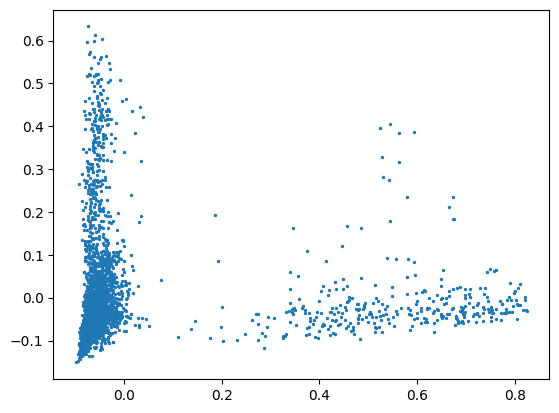

In [23]:
reduce_dim(PCA(n_components=2, svd_solver="arpack"), tf_idf_matrix_kos)


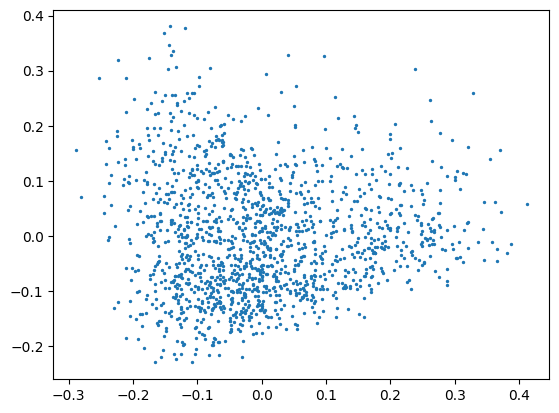

In [24]:
reduce_dim(PCA(n_components=2, svd_solver="arpack"), tf_idf_matrix_nips)

### t-SNE

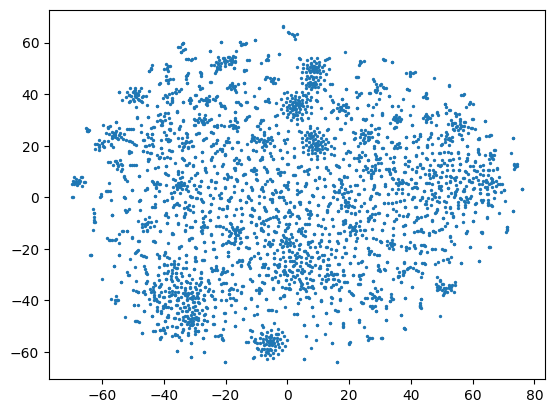

In [25]:
reduce_dim(TSNE(n_components=2, init="random", random_state=SEED), tf_idf_matrix_kos)

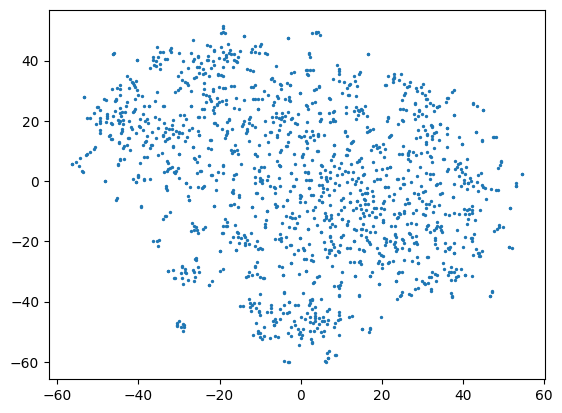

In [26]:
reduce_dim(TSNE(n_components=2, init="random", random_state=SEED), tf_idf_matrix_nips)

### UMAP

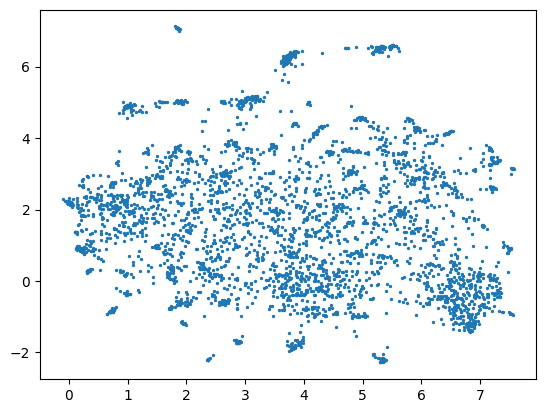

In [31]:
#many hyperparams!
reduce_dim(umap.UMAP(n_components=2), tf_idf_matrix_kos)

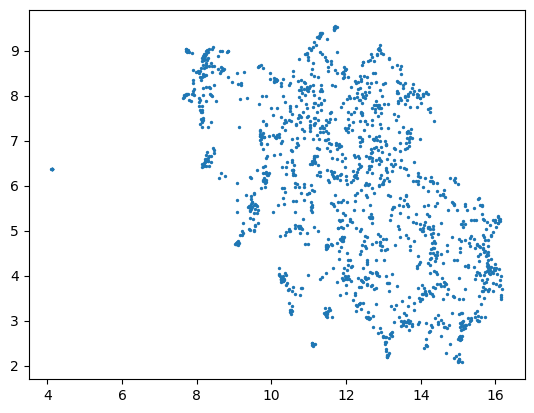

In [33]:
reduce_dim(umap.UMAP(n_components=2), tf_idf_matrix_nips)

### LSP

not working (https://github.com/hhliz/LSP)

## Latent Dirichlet Allocation

Extraction of themes

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

lda_kos = LatentDirichletAllocation(n_components=10, random_state=SEED)

X_new_kos = lda_kos.fit_transform(counts_matrix_kos)
lda_nips = LatentDirichletAllocation(n_components=10, random_state=SEED)
X_new_nips = lda_nips.fit_transform(counts_matrix_nips)

In [50]:
themes_kos = np.argmax(X_new_kos, axis=1)
themes_nips = np.argmax(X_new_nips, axis=1)

In [46]:
n_words = 5

for i in range(lda_kos.components_.shape[0]):
    ind =  np.argpartition(lda_kos.components_[i, :], -n_words)[-n_words:]

    words = [vocab_kos[word_id] for word_id in ind]
    print(i, words)

0 ['billion', 'tax', 'deficit', 'budget', 'bush']
1 ['governor', 'electoral', 'house', 'poll', 'november']
2 ['primary', 'democratic', 'kerry', 'edwards', 'dean']
3 ['war', 'kerry', 'administration', 'bush', 'president']
4 ['american', 'iraqi', 'war', 'iraq', 'bush']
5 ['time', 'people', 'party', 'political', 'media']
6 ['general', 'percent', 'poll', 'kerry', 'bush']
7 ['house', 'senate', 'republican', 'race', 'democrats']
8 ['republicans', 'texas', 'delay', 'house', 'bush']
9 ['general', 'officials', 'people', 'war', 'military']


In [48]:
n_words = 5

for i in range(lda_nips.components_.shape[0]):
    ind =  np.argpartition(lda_nips.components_[i, :], -n_words)[-n_words:]

    words = [vocab_nips[word_id] for word_id in ind]
    print(i, words)

0 ['word', 'speech', 'recognition', 'system', 'network']
1 ['error', 'parameter', 'function', 'network', 'model']
2 ['tree', 'set', 'training', 'model', 'data']
3 ['problem', 'policy', 'function', 'algorithm', 'learning']
4 ['dynamic', 'system', 'model', 'learning', 'control']
5 ['analog', 'neural', 'chip', 'network', 'circuit']
6 ['system', 'model', 'neuron', 'cell', 'input']
7 ['learning', 'vector', 'data', 'set', 'algorithm']
8 ['weight', 'unit', 'input', 'network', 'learning']
9 ['field', 'object', 'visual', 'cell', 'model']


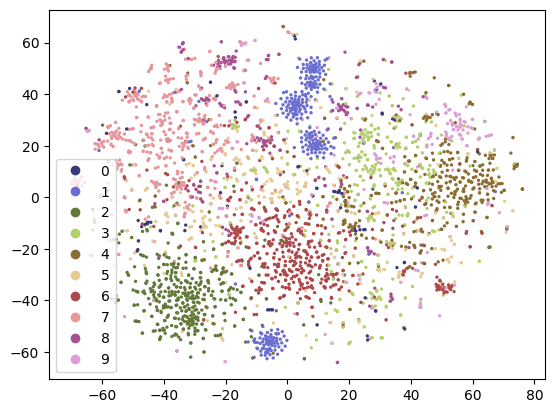

In [51]:
reduce_dim(TSNE(n_components=2, init="random", random_state=SEED), tf_idf_matrix_kos, colour=themes_kos, cmap="tab20b")

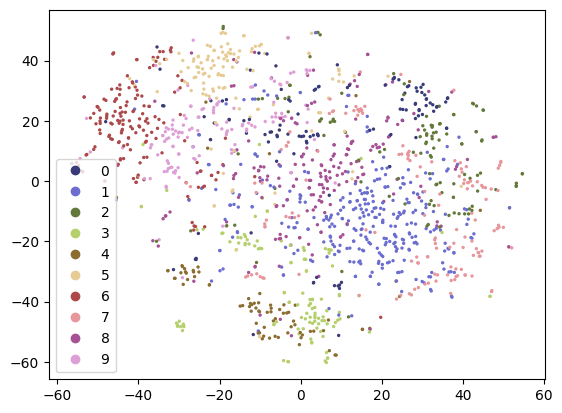

In [52]:
reduce_dim(TSNE(n_components=2, init="random", random_state=SEED), tf_idf_matrix_nips, colour=themes_nips, cmap="tab20b")

### Max tfidf

In [53]:
themes_kos

array([3, 3, 1, ..., 5, 7, 7])

In [65]:
np.array(tf_idf_matrix_kos.todense())

array([[0.        , 0.        , 0.        , ..., 0.        , 0.08710494,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [69]:
max_kos = np.argmax(np.array(tf_idf_matrix_kos.todense()), axis=1)

In [73]:
np.unique(max_kos).shape

(1675,)